<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793469/blob/main/A01793469_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Alberto Patraca Sotomayor
#Matrícula: A01793469

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [12]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W, D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [13]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print('---------Matriz Original(A1)--------')
print(A1)
print('------------------------------------')
values1, W1 = np.linalg.eig(A1)
D1 = np.diag(values1)
W1_inv = np.linalg.inv(W1)
print('-----------------W1-----------------')
print(W1)
print('------------------------------------')
print('-----------------D1-----------------')
print(D1)
print('------------------------------------')
print('---------------W1_inv---------------')
print(W1_inv)
print('------------------------------------')
B1 = np.dot(np.dot(W1, D1), W1_inv)
print('------Matriz Reconstruida(B1)-------')
print(B1)
print('------------------------------------')
print('----Matriz Reconstruida Redondeada a 3 decimales(B1)----')
print(B1.round(3))
print('------------------------------------')


---------Matriz Original(A1)--------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
------------------------------------
-----------------W1-----------------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
------------------------------------
-----------------D1-----------------
[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.22774424+1.82582815j 0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.22774424-1.82582815j]]
------------------------------------
---------------W1_inv---------------
[[-0.95827338-1.73001905e-17j -0.1739303 +3.46003810e-17j
  -0.61649796-0.00000000e+00j]
 [-0.30900456-3.92091481e-01j  0.52417711+1.74262881e-01j
  -0.19879576+9.96744696e-01j]
 [-0.30900456+3.92091481e-01j  0.52417711-1.74262881e-01j
  -0.19879576-9.96744696e

In [14]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print('---------Matriz Original(A2)--------')
print(A2)
print('------------------------------------')
values2, W2 = np.linalg.eig(A2)
D2 = np.diag(values2)
W2_inv = np.linalg.inv(W2)
print('-----------------W2-----------------')
print(W2)
print('------------------------------------')
print('-----------------D2-----------------')
print(D2)
print('------------------------------------')
print('---------------W2_inv---------------')
print(W2_inv)
print('------------------------------------')
B2 = np.dot(np.dot(W2, D2), W2_inv)
print('------Matriz Reconstruida(B2)-------')
print(B2)
print('------------------------------------')
print('----Matriz Reconstruida Redondeada a 3 decimales(B2)----')
print(B2.round(3))
print('------------------------------------')


---------Matriz Original(A2)--------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
------------------------------------
-----------------W2-----------------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
------------------------------------
-----------------D2-----------------
[[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]
------------------------------------
---------------W2_inv---------------
[[ 0.72111026  0.72111026  2.88444102]
 [-0.56568542  0.84852814  1.50849447]
 [ 0.          0.          3.14466038]]
------------------------------------
------Matriz Reconstruida(B2)-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
------------------------------------
----Matriz Reconstruida Redondeada a 3 decimales(B2)----
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
------------------------------------


In [15]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print('---------Matriz Original(A3)--------')
print(A3)
print('------------------------------------')
values3, W3 = np.linalg.eig(A3)
D3 = np.diag(values3)
W3_inv = np.linalg.inv(W3)
print('-----------------W3-----------------')
print(W3)
print('------------------------------------')
print('-----------------D3-----------------')
print(D3)
print('------------------------------------')
print('---------------W3_inv---------------')
print(W3_inv)
print('------------------------------------')
B3 = np.dot(np.dot(W3, D3), W3_inv)
print('------Matriz Reconstruida(B3)-------')
print(B3)
print('------------------------------------')
print('----Matriz Reconstruida Redondeada a 3 decimales(B3)----')
print(B3.round(3))
print('------------------------------------')

---------Matriz Original(A3)--------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
------------------------------------
-----------------W3-----------------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
------------------------------------
-----------------D3-----------------
[[ 6.89167094  0.          0.        ]
 [ 0.         -0.214175    0.        ]
 [ 0.          0.         -0.67749594]]
------------------------------------
---------------W3_inv---------------
[[ 1.57159201  1.10218456  0.18707504]
 [ 3.67287466  2.64661304 -2.17976243]
 [-2.90368638 -3.32287499  1.98085426]]
------------------------------------
------Matriz Reconstruida(B3)-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
------------------------------------
----Matriz Reconstruida Redondeada a 3 decimales(B3)----
[[ 5.  4. -0.]
 [ 1. -0.  1.

## La descomposición y reconstrucción de matrices me ayuda a comprender que la información se puede almacenar en varias matrices, las cuales se pueden transformar y con las que se pueden realizar operaciones posteriores que nos permiten regresar a la información original que teníamos. En resumidas cuentas, podemos realizar una serie de transformaciones a nuestras matrices de información para convertirla en bloques más manejables, teniendo siempre la posibilidad de regresar a la información original.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


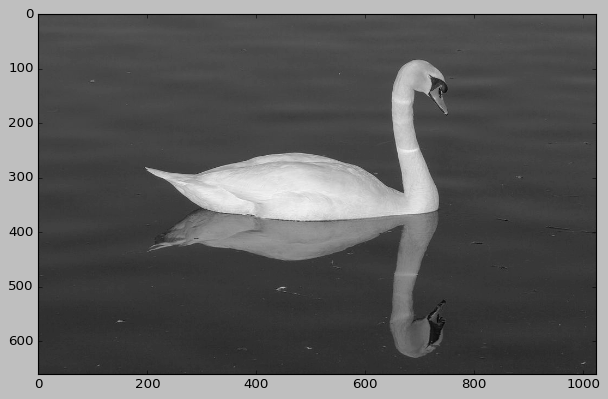

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F269DFBB590>


In [16]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [17]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [18]:
U.shape

(660, 660)

In [19]:
V.shape

(1024, 1024)

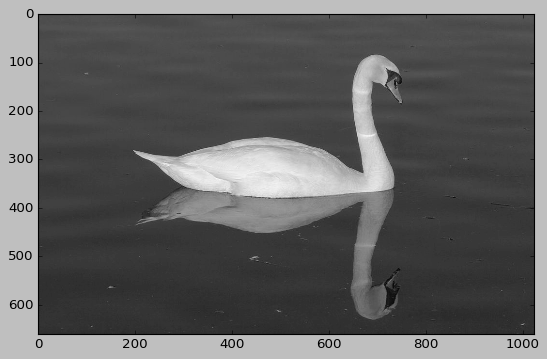

Felicidades la imagen está comprimida


In [20]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 660
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

In [21]:
def image_reading(url) -> np.matrix:
  img = Image.open(urllib.request.urlopen(url)).convert('LA')
  img_arr = np.array(img.getdata(band=0), float)
  img_arr.shape = (img.size[1],img.size[0])
  plt.figure(figsize=(9,6))
  print(img_arr.shape)
  print('------------------Original Image-----------------')
  plt.imshow(img_arr,cmap='gray')
  plt.show()
  return img_arr

def image_compression(img_matrix: np.array, nvalue: int):
  U, D, V = np.linalg.svd(img_matrix)
  ref_value = min([U.shape[0], V.shape[0]])
  if nvalue > ref_value:
    nvalue = ref_value//12
  ncompression = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  print('----------------Compressing the image with the value given-----------------')
  plt.imshow(ncompression,cmap='gray')
  plt.show()
  invvalue = ref_value - nvalue
  invcompression = np.matrix(U[:,:invvalue])*np.diag(D[:invvalue])*np.matrix(V[:invvalue,:])
  print('------------Compressing the image with the inverse of value given---------------')
  plt.imshow(invcompression,cmap='gray')
  plt.show()
  compression_dif = np.subtract(ncompression, invcompression)
  print('------------Differences between both compressions--------------')
  plt.imshow(compression_dif,cmap='gray')
  plt.show()
  revcompression = np.matrix(U[:,-nvalue:])*np.diag(D[-nvalue:])*np.matrix(V[-nvalue:,:])
  print('------------Compressing the image in reverse with value given---------------')
  plt.imshow(revcompression,cmap='gray')
  plt.show()

(800, 1200)
------------------Original Image-----------------


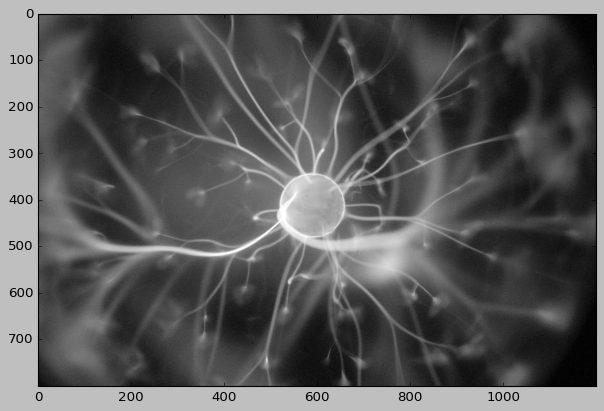

----------------Compressing the image with the value given-----------------


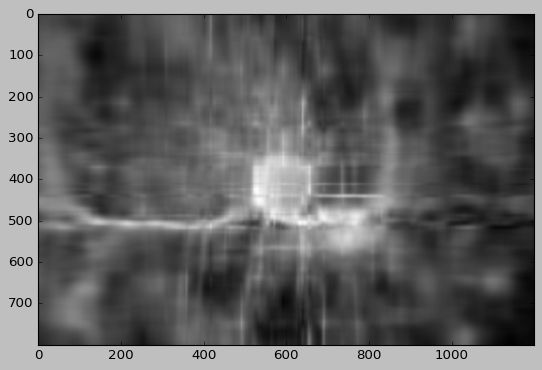

------------Compressing the image with the inverse of value given---------------


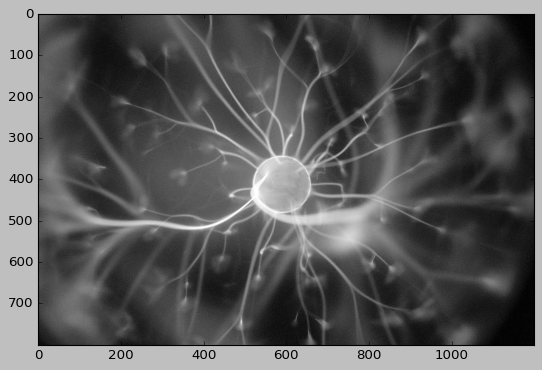

------------Differences between both compressions--------------


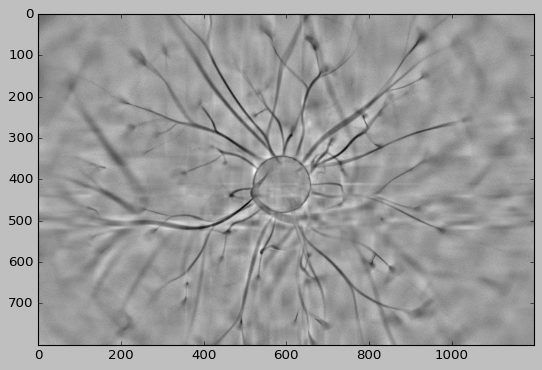

------------Compressing the image in reverse with value given---------------


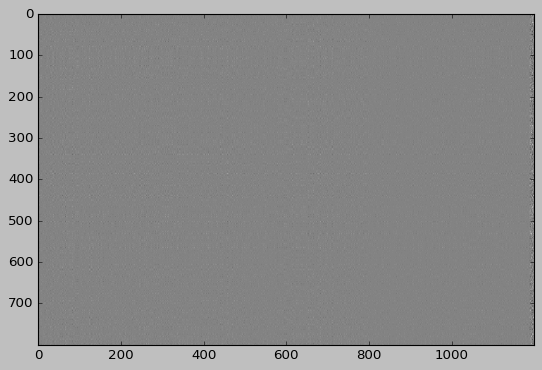

In [22]:
#imagen 1
img_arr1 = image_reading('https://biblioteca.acropolis.org/wp-content/uploads/2019/03/alma-ciencia.jpg')
image_compression(img_arr1, 10)

(1200, 864)
------------------Original Image-----------------


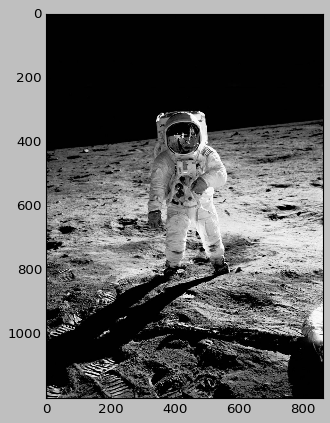

----------------Compressing the image with the value given-----------------


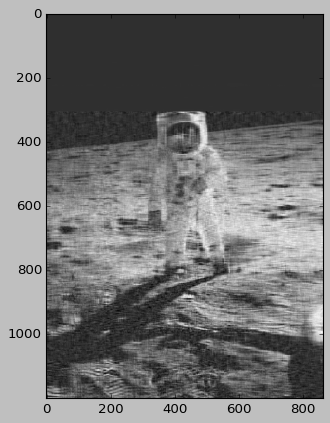

------------Compressing the image with the inverse of value given---------------


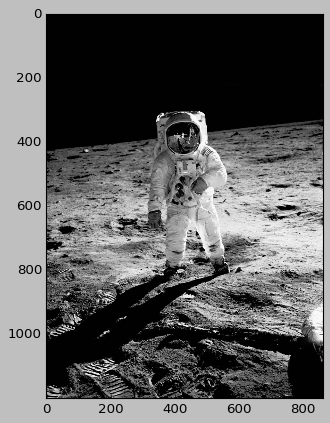

------------Differences between both compressions--------------


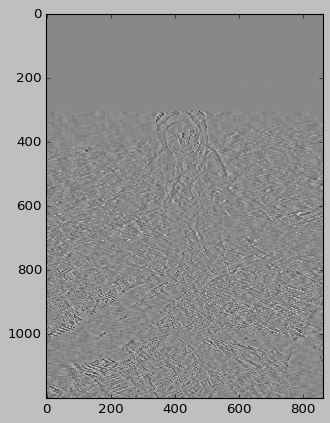

------------Compressing the image in reverse with value given---------------


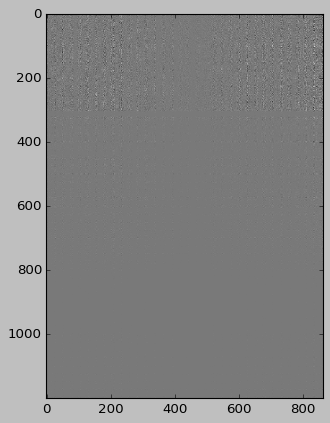

In [23]:
#imagen 2
img_arr2 = image_reading('https://biblioteca.acropolis.org/wp-content/uploads/2019/07/Neil-Armstrong.jpg')
image_compression(img_arr2, 35)

(960, 1280)
------------------Original Image-----------------


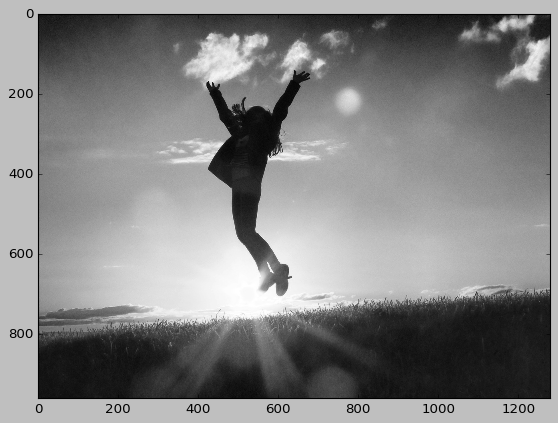

----------------Compressing the image with the value given-----------------


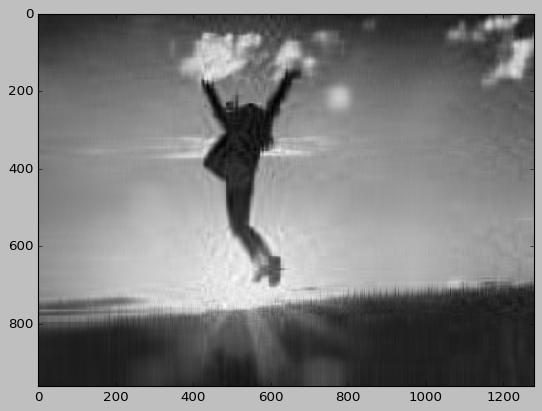

------------Compressing the image with the inverse of value given---------------


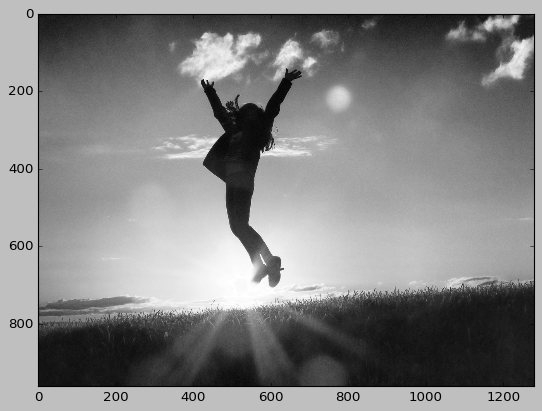

------------Differences between both compressions--------------


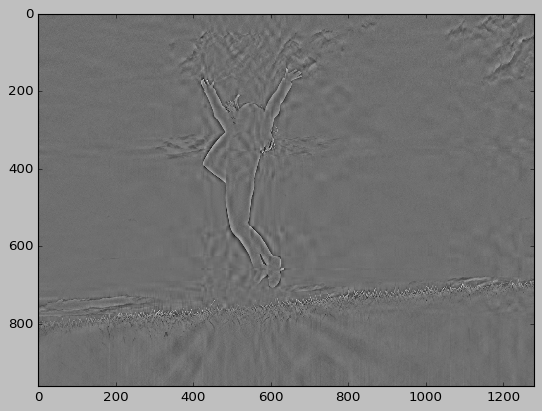

------------Compressing the image in reverse with value given---------------


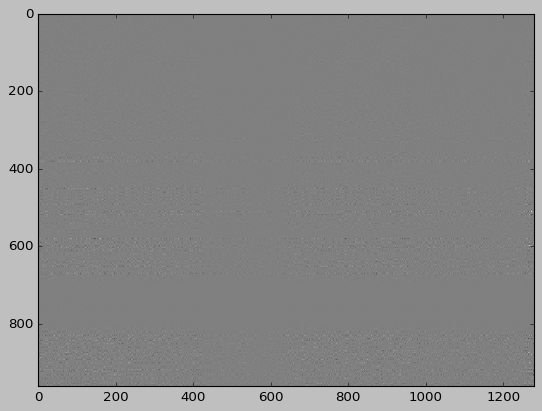

In [24]:
#imagen 3
img_arr3 = image_reading('https://biblioteca.acropolis.org/wp-content/uploads/2016/10/inspiration.jpg')
image_compression(img_arr3, 24)

## Este ejercicio de compresión de imágenes me permitió comprender cómo funciona una descomposición SVD. Preferí realizar una función que pudiera aplicarse a las 3 imágenes. Esta función toma un arreglo(imagen original) y un número entero(nvalue), que es la cantidad de elementos tomará en cuenta. Como primer paso realiza la descomposición SVD de la matriz original de la imágen (escala de grises). Posteriormente establece cuál de las 2 dimensiones (ancho y alto) es la que contiene esos pixeles y extrae la de menor valor(ref_value). Si "nvalue" es mayor que ese "ref_value", "nvalue" pasa a tomar el valor de la décima parte de "ref_value". El siguiente paso es realizar la reconstrucción con los primeros "nvalue" elementos, realizando las multiplicaciones matriciales correspondientes de U, D y V. La siguiente reconstrucción se realiza con el valor resultante de ref_value-nvalue, tomando esta cantidad de elementos en cuenta. La tercera matriz es la resta (diferencia) de estas primeras 2 imágenes. Finalmente, la última matriz utiliza los últimos "nvalue" elementos de las matrices, finalizando así su ejecución. 
##*Explicación: Las primeras 2 matrices son muy similares mientras el valor de nvalue se encuentre entre el 10% y 90% de ref_value, en estos casos donde se parecen mucho, la 3ra imagen resulta en un tono gris constante, fuera de estos rangos (menor a 10% o mayor a 90%) la imagen de diferencias muestra los rasgos que ha perdido alguna de estas en la compresión, generalmente los bordes (cambios de tonalidades súbitos). La última imagen siempre será pixeles grises sin forma, debido a que, como sabemos, en una PCA las columnas más importantes son las primeras, mientras que las últimas no contienen casi nada de información.* 

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [25]:
#tu codigo aqui
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [26]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xscaled)

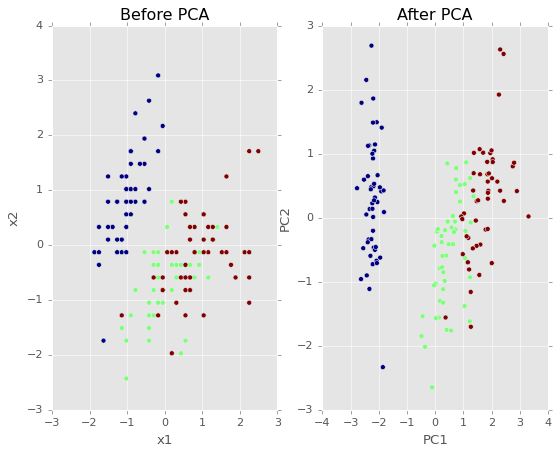

In [27]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(Xscaled[:,0], Xscaled[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(Xpca[:,0], Xpca[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [28]:
print(f'Original Dataset Variances: {scaler.var_}')
print(f'PCA Variance Ratios: {pca.explained_variance_ratio_}')

Original Dataset Variance Ratios: [0.68112222 0.18871289 3.09550267 0.57713289]
PCA Variance Ratios: [0.72962445 0.22850762]


In [29]:
np.cov(Xpca.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [30]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [31]:
abs(pca.components_)

array([[0.52106591, 0.26934744, 0.5804131 , 0.56485654],
       [0.37741762, 0.92329566, 0.02449161, 0.06694199]])

In [32]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

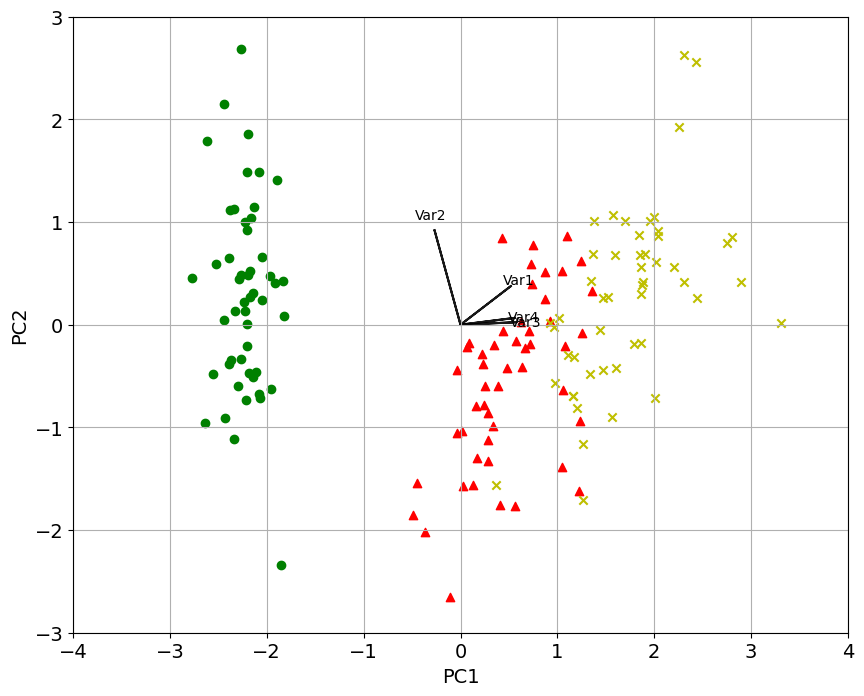

In [33]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
biplot(Xpca[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [34]:
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027961

In [35]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.4284401043305395

## Este ejercicio me fue de mucha ayuda, ya que los apoyos visuales permiten tener mayor referencia de conceptos que son bastante abstractos. PCA es una técnica que nos permite recopliar la información de mayor peso (más importante) de un conjunto de datos.

#¿Qué es feature importance y para que nos sirve? 
## *R: Feature importance nos ayuda a identificar qué variables son las que más afectan en el resultado, es decir, cuáles son las más importantes para poder predecir con la mayor exactitud posible. Esta identificación de los rubros más relevantes, nos permite despreciar a los de menor impacto, comprendiendo y tomando en cuenta cuál sería la cantidad de información que se perdería. Sin embargo, al reducir la cantidad de variables a considerar, se vuelve más eficiente el cómputo, entrenamiento y definición de los modelos.*
#¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
## *R: Me pareció muy interesante el poder entender cómo es que se obtienen los componentes, y cómo se pueden calcular utilizando las matrices y los eigenvalores. También el saber qué características son las que influyen más en cada componente y la gráfica biplot me premitió entender la correlación entre las distintas características de una manera muy visual.*
#¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
##*R: Al momento de reducir la cantidad de elementos a utilizar en un modelo, permitiendo obtener los valores de mayor importancia e impacto, logrando obtener buenos resultados sin necesidad de tantos recursos de cómputo, o, de manera inversa, para modelos complejos, permitir optimizar y eficientar el uso de los recursos dentro de la gran carga computacional. Concluyendo, en cualquier conjunto de datos de gran extensión (muchos registros, muchas variables, o ambos) es recomendable utilizar PCA para poder reducir el conjunto a lo que realmente importa. Como se dice comúnmente, a veces es mejor calidad que cantidad.*